# BIFROST Flux simulation: Datatreatment

#### Packages

In [2]:
#import sys
#sys.path.append('/Users/kristinekrighaar/Documents/')
#from functions import *

from KGS import *

mpl.rcParams['font.family'] = 'Times New Roman'

## Flux simulation with wavelengthband size of 0.04 Å 

### Importing the data

In [3]:
#variables: WaveMin L_monBeforePSC1_I L_monBeforePSC1_ERR ToFBeforerPSC1_I ToFBeforerPSC1_ERR TofLambdaBeforePSC_I TofLambdaBeforePSC_ERR ToFInsidePSC_I ToFInsidePSC_ERR TofLambdaAfterPSC2_I TofLambdaAfterPSC2_ERR ToFAfterPSC2_I ToFAfterPSC2_ERR L_monAfterPSC2_I L_monAfterPSC2_ERR L_monBeforeFOC1_I L_monBeforeFOC1_ERR ToFBeforeFOC1_I ToFBeforeFOC1_ERR ToFAfterFOC1_I ToFAfterFOC1_ERR L_monAfterFOC1_I L_monAfterFOC1_ERR L_monBeforeFOC2_I L_monBeforeFOC2_ERR ToFBeforeFOC2_I ToFBeforeFOC2_ERR ToFAfterFOC2_I ToFAfterFOC2_ERR Div2d_AfterBender_I Div2d_AfterBender_ERR ToFAfterBender_I ToFAfterBender_ERR Div2d_BeforeStraight_I Div2d_BeforeStraight_ERR L_monBeforeBWC_I L_monBeforeBWC_ERR ToFBeforeBWC_I ToFBeforeBWC_ERR ToFAfterBWC_I ToFAfterBWC_ERR L_monAfterBWC_I L_monAfterBWC_ERR Lmon_guide_end_I Lmon_guide_end_ERR PSD_sample_small_I PSD_sample_small_ERR Div2d_sample_B_I Div2d_sample_B_ERR Div2d_sample_I Div2d_sample_ERR PSD_sample_large_I PSD_sample_large_ERR PSD_sample_small_after_I PSD_sample_small_after_ERR ToFatSample_I ToFatSample_ERR Lmon_sample_I Lmon_sample_ERR e_monitor_test_I e_monitor_test_ERR tof_monitor_2p7_mid_res_I tof_monitor_2p7_mid_res_ERR e_monitor_2p7_mid_res_I e_monitor_2p7_mid_res_ERR psd_det_2p7_mid_res_I psd_det_2p7_mid_res_ERR tof_monitor_3p2_mid_res_I tof_monitor_3p2_mid_res_ERR e_monitor_3p2_mid_res_I e_monitor_3p2_mid_res_ERR psd_det_3p2_mid_res_I psd_det_3p2_mid_res_ERR tof_monitor_3p8_mid_res_I tof_monitor_3p8_mid_res_ERR e_monitor_3p8_mid_res_I e_monitor_3p8_mid_res_ERR psd_det_3p8_mid_res_I psd_det_3p8_mid_res_ERR tof_monitor_4p4_mid_res_I tof_monitor_4p4_mid_res_ERR e_monitor_4p4_mid_res_I e_monitor_4p4_mid_res_ERR psd_det_4p4_mid_res_I psd_det_4p4_mid_res_ERR tof_monitor_5p0_mid_res_I tof_monitor_5p0_mid_res_ERR e_monitor_5p0_mid_res_I e_monitor_5p0_mid_res_ERR psd_det_5p0_mid_res_I psd_det_5p0_mid_res_ERR

flux_0p04 = np.loadtxt('./Flux_test_band_0p05Å_5/mccode.dat').T

flux_1p6 = np.loadtxt('./Flux_test_band_1p6Å_5/mccode.dat').T

WaveMin_1p6 = flux_1p6[0]
I_1p6= flux_1p6[63]
I_1p6_err = flux_1p6[64]


### plotting

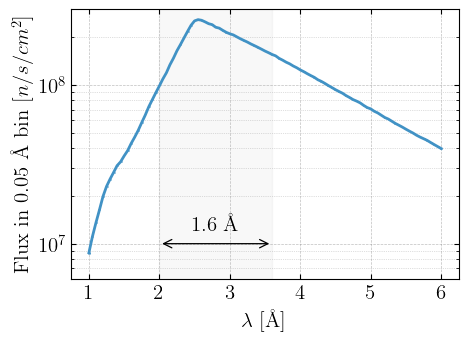

In [4]:
WaveMin_0p04 = flux_0p04[0]
I_0p04 = flux_0p04[63]
I_0p04_err = flux_0p04[64]

plt.figure(figsize = (5,3.5))
y_range = np.array([4.5e6, 5e8])
plt.fill_betweenx(y_range, 2.0, 3.6, alpha=0.05, color='grey')

plt.errorbar(WaveMin_0p04, I_0p04, yerr=I_0p04_err, fmt='-', label='McStas', color='#4192C5', capsize=0, linewidth=2)

plt.yscale('log')
plt.xlabel('$\lambda$ [Å]')
plt.ylabel('Flux in 0.05 Å bin [$n/s/cm^2$]')
plt.xticks([1, 2, 3, 4, 5, 6])
plt.ylim(6e6, 3e8)

plt.grid(which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

plt.annotate(
    text='',
    xy=(2, 1e7),    # starting point of the arrow
    xytext=(3.6, 1e7),  # ending point of the arrow
    arrowprops=dict(arrowstyle='<->', color='black', linewidth=0.9),
)

# Add labels to the arrow
plt.text(2.8, 1.3e7, '1.6 Å', color='black', ha='center', va='center', fontsize=15)

plt.savefig('Flux_kurve_0.05Å_bånd.png', format='png', bbox_inches='tight')

## Taking the sum over the 1.6 Å bands

In [5]:

indexes_low = np.where((WaveMin_0p04 + 1.6) < 6)[0]

indexes_high = indexes_low+40

I_integral = []

for i in range(len(indexes_low)):
    integral = np.sum(I_0p04[i:indexes_high[i]])
    I_integral.append(integral)

I_integral = np.asarray(I_integral)



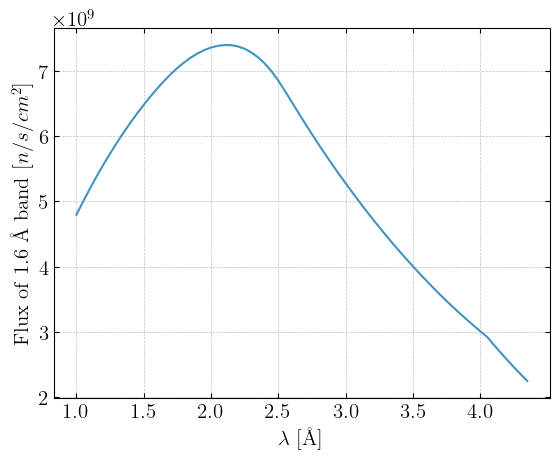

In [6]:
plt.figure()
plt.errorbar(WaveMin_0p04[indexes_low], I_integral, fmt='-', label='McStas', color='#4192C5', capsize=0.1)
#plt.legend(fontsize=13)
#plt.yscale('log')
plt.xlabel('$\lambda$ [Å]')
plt.ylabel('Flux of 1.6 Å band [$n/s/cm^2$]')
plt.xticks([1, 1.5, 2, 2.5, 3, 3.5, 4])
plt.grid(which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

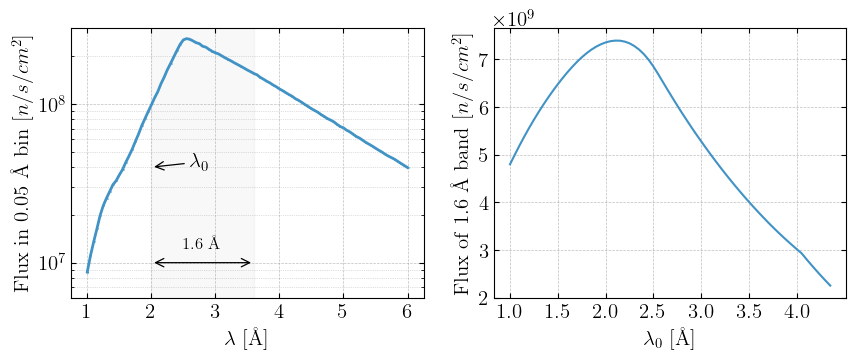

In [7]:
fig, ax = plt.subplots(1,2, figsize = (10,3.5))

y_range = np.array([3e6, 3e8])
ax[0].fill_betweenx(y_range, 2.0, 3.6, alpha=0.05, color='grey')

ax[0].errorbar(WaveMin_0p04, I_0p04, yerr=I_0p04_err, fmt='-', label='McStas', color='#4192C5', capsize=0, linewidth=2)

ax[0].set_yscale('log')
ax[0].set_xlabel('$\lambda$ [Å]')
ax[0].set_ylabel('Flux in 0.05 Å bin [$n/s/cm^2$]')
ax[0].set_xticks([1, 2, 3, 4, 5, 6])
ax[0].set_ylim(6e6, 3e8)

ax[0].grid(which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax[0].grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

ax[0].annotate(
    text='',
    xy=(2, 1e7),    # starting point of the arrow
    xytext=(3.6, 1e7),  # ending point of the arrow
    arrowprops=dict(arrowstyle='<->', color='black', linewidth=0.9),
)
ax[0].text(2.8, 1.3e7, '1.6 Å', color='black', ha='center', va='center', fontsize=12)

ax[0].annotate(
    text=r'$\lambda_0$',
    xy=(2, 4e7),    # starting point of the arrow
    xytext=(2.6, 4e7),  # ending point of the arrow
    arrowprops=dict(arrowstyle='->', color='black', linewidth=0.9),
)


ax[1].errorbar(WaveMin_0p04[indexes_low], I_integral, fmt='-', label='McStas', color='#4192C5', capsize=0.1)
#ax[1].errorbar(WaveMin_1p6, I_1p6, yerr=I_1p6_err, fmt='-', label='McStas', color='#4192C5', capsize=0, linewidth=2)
ax[1].set_xlabel('$\lambda_0$ [Å]')
ax[1].set_ylabel('Flux of 1.6 Å band [$n/s/cm^2$]')
ax[1].set_xticks([1, 1.5, 2, 2.5, 3, 3.5, 4])
ax[1].grid(which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax[1].grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('Flux_kurver_BIFROST_bånd.png', format='png', bbox_inches='tight')



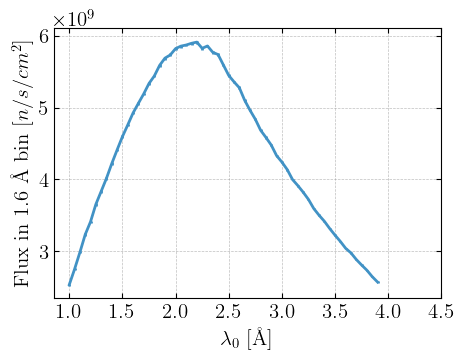

In [8]:


plt.figure(figsize = (5,3.5))

plt.errorbar(WaveMin_1p6, I_1p6, yerr=I_1p6_err, fmt='-', label='McStas', color='#4192C5', capsize=0, linewidth=2)

#plt.yscale('log')
plt.xlabel('$\lambda_0$ [Å]')
plt.ylabel('Flux in 1.6 Å bin [$n/s/cm^2$]')
plt.xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
#plt.ylim(4.5e7, 2e9)

plt.grid(which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)


plt.savefig('Flux_kurve_1.6Å_bånd.png', format='png', bbox_inches='tight')

# Brilliance transfer

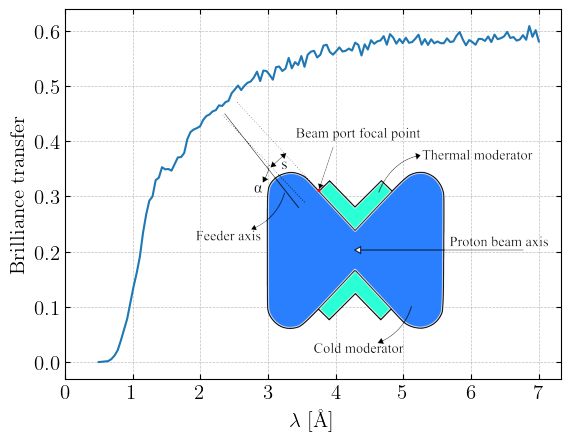

In [13]:
brilliance = np.loadtxt('./Brilliance_transfer_10/mccode.dat').T

import matplotlib.image as mpimg

# Load the PNG image
img = mpimg.imread('Moderator_V1.png')


lam = brilliance[0]

brilliance_start_I = brilliance[1]
brilliance_start_I_err = brilliance[2]

brilliance_end_I = brilliance[65]
brilliance_end_I_err = brilliance[66]

B = brilliance_end_I/brilliance_start_I

fig, ax = plt.subplots()
ax.plot(lam, B)
ax.set_xlabel(r'$\lambda$ [Å]')
ax.set_ylabel('Brilliance transfer')
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.grid(which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
newax = fig.add_axes([0.33,0.15,0.55,0.55], zorder=1)
newax.imshow(img)
newax.axis('off')
fig.savefig('Brilliance_transfer_articel.png', format='png', bbox_inches='tight')
